# ECG arrhythmia classification using CNN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Neccessary Libraries

In [3]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Image Data Agumentation

In [4]:

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [5]:

test_datagen=ImageDataGenerator(rescale=1./255)

### Loading our data and performing data agumentation

In [6]:

x_train=train_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/forest fire/train_set',target_size=(64,64),batch_size=32,class_mode='categorical')
x_test=test_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/forest fire/test_set',target_size=(64,64),batch_size=32,class_mode='categorical')


Found 450 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [7]:
print(x_train.class_indices)

{'forest': 0, 'with fire': 1}


In [8]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 295, 1: 155})

### Creating the model

In [9]:

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
                            
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(2,activation='softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 985,058
Trainable params: 985,058
Non-trainable params: 0
__________________________________________________

### Compiling the model

In [11]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
len(x_train)

15

### Fitting the model

In [13]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
15/15 [==============================] - 92s 6s/step - loss: 1.8011 - accuracy: 0.7578 - val_loss: 0.4517 - val_accuracy: 0.8430
Epoch 2/10
15/15 [==============================] - 14s 949ms/step - loss: 0.4757 - accuracy: 0.8600 - val_loss: 0.2246 - val_accuracy: 0.8926
Epoch 3/10
15/15 [==============================] - 14s 942ms/step - loss: 0.2657 - accuracy: 0.8800 - val_loss: 0.0870 - val_accuracy: 0.9835
Epoch 4/10
15/15 [==============================] - 14s 918ms/step - loss: 0.1918 - accuracy: 0.9400 - val_loss: 0.0663 - val_accuracy: 0.9752
Epoch 5/10
15/15 [==============================] - 14s 947ms/step - loss: 0.1960 - accuracy: 0.9178 - val_loss: 0.0949 - val_accuracy: 0.9835
Epoch 6/10
15/15 [==============================] - 14s 949ms/step - loss: 0.1883 - accuracy: 0.9200 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 15s 1s/step - loss: 0.1797 - accuracy: 0.9222 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch

In [14]:
#model.fit_generator(x_train,epochs=10,validation_data=x_test)

### Saving our model

In [15]:

model.save('forest1 (2).h5')

### Predicting our results

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("/content/forest1 (2).h5")

In [19]:
img = image.load_img(r"/content/drive/MyDrive/forest fire/train_set/forest/with_fire (1) (1).gif",target_size= (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
preds=model.predict(x)
preds=np.argmax(preds,axis=1)
preds

1/1 [==============================] - 0s 77ms/step


array([0])

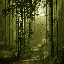

In [20]:
img

In [21]:
index=['Forest','With Fire']
result = str(index[preds[0]])
result

'Forest'

In [22]:
img = image.load_img(r"/content/drive/MyDrive/forest fire/train_set/with fire/with fire (1).png",target_size= (64,64))#loading of the image
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
preds=model.predict(x)
pred=np.argmax(preds,axis=1)
preds

1/1 [==============================] - 0s 14ms/step


array([[0., 1.]], dtype=float32)

In [27]:
 index=['Forest','With Fire']
result=str(index[pred[0]])
result

'With Fire'

In [28]:
img = image.load_img(r"/content/drive/MyDrive/forest fire/test_set/with fire/19464620_401.jpg",target_size= (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
preds=model.predict(x)
pred=np.argmax(preds,axis=1)
index=['Forest','With Fire']
result=str(index[pred[0]])
result

1/1 [==============================] - 0s 20ms/step


'With Fire'